In [2]:
## IMPORTS
import pandas as pd
import config
import config_func 
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [3]:
## CONFIG VARIABLES
## FILES
INPUT_FOLDER = 'input'
IMAGES_ACESS = 'images/*.jpg'
INFO_PATIENTS = 'HAM10000_metadata.csv'
PIXEL_28_RGB_CSV = 'HMNIST_28_28_RGB.csv'

#DATAFRAME COLUMNS
LESION_ID = 'lesion_id'
IMAGE_ID = 'image_id'
DX = 'dx'
DX_TYPE = 'dx_type'
AGE = 'age'
SEX = 'sex'
LOCALIZATION = 'localization'
PATH = 'path'

#OTHER VARIABLES
MALE = 'male'
FEMALE = 'female'
UNKNOWN = 'unknown'
SCALP = 'scalp'
EAR = 'ear'
FACE = 'face'
BACK = 'back'
TRUNK = 'trunk'
CHEST = 'chest'
UPPER_EXTREMEMITY = 'upper_extremity'
ABDOMEN = 'abdomen'
LOWER_EXTREMITY = 'lower_extremity'
GENITAL = 'genital'
NECK = 'neck'
HAND = 'hand'
FOOT = 'foot'
ACRAL = 'acral'
BKL = 'bkl'
NV = 'nv'
DF = 'df'
MEL = 'mel'
VASC = 'vasc'
BCC = 'bcc'
AKIEC = 'akiec'


In [4]:
## IMPORTANT PATH FOLDERS, THAT AGGREGATES DATASET INFORMATION
import os

ROOT_DIR = os.getcwd()
print(ROOT_DIR)
INPUT_DIR = os.path.join(ROOT_DIR, config.INPUT_FOLDER)
print(INPUT_DIR)
PATIENTS_INFO = os.path.join(INPUT_DIR, config.INFO_PATIENTS)
print(PATIENTS_INFO)


C:\Users\KIIT\ML Projects\skin_mnist-master\skin_mnist-master
C:\Users\KIIT\ML Projects\skin_mnist-master\skin_mnist-master\input
C:\Users\KIIT\ML Projects\skin_mnist-master\skin_mnist-master\input\HAM10000_metadata.csv


In [5]:
PATIENTS_INFO

'C:\\Users\\KIIT\\ML Projects\\skin_mnist-master\\skin_mnist-master\\input\\HAM10000_metadata.csv'

In [6]:
INPUT_FOLDER

'input'

In [7]:
INPUT_DIR

'C:\\Users\\KIIT\\ML Projects\\skin_mnist-master\\skin_mnist-master\\input'

In [11]:
IMAGES_REGEX 

'C:\\Users\\KIIT\\ML Projects\\skin_mnist-master\\skin_mnist-master\\input\\images/*.jpg'

In [9]:
IMAGES_ACESS

'images/*.jpg'

In [18]:
## GET PATHS FOR ALL IMAGES
IMAGES_REGEX = os.path.join(INPUT_DIR, config.IMAGES_ACESS)
images_paths = config_func.getImages(IMAGES_REGEX)
images_paths[0]


'C:\\Users\\KIIT\\ML Projects\\skin_mnist-master\\skin_mnist-master\\input\\images\\ISIC_0024306.jpg'

In [19]:
len(images_paths)

10015

In [21]:
##GET DATA
data = pd.read_csv(PATIENTS_INFO)
data.iloc[0] #SEE OUTPUT OF FIRST ROW, TO CHECK AFTER IF NEW DATAFRAME IS ALREADY WELL CREATED
data.head(5)

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [22]:
len(data)

10015

In [23]:
## DATAFRAME INFO
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [24]:
##SORT BY IMAGE_ID, IN COHERENCE IMAGE_PATHS
data = data.sort_values(config.IMAGE_ID, ascending=True)
data.head(5)


,lesion_id,image_id,dx,dx_type,age,sex,localization
4349,HAM_0000550,ISIC_0024306,nv,follow_up,45.0,male,trunk
4263,HAM_0003577,ISIC_0024307,nv,follow_up,50.0,male,lower extremity
4217,HAM_0001477,ISIC_0024308,nv,follow_up,55.0,female,trunk
3587,HAM_0000484,ISIC_0024309,nv,follow_up,40.0,male,trunk
1451,HAM_0003350,ISIC_0024310,mel,histo,60.0,male,chest


In [25]:
def addNewColumn_Populate_DataFrame(dataFrame, name_new_column, dataToPopulate):

    '''
    THIS FUNCTION IS USED TO ADD NEW COLUMN TO DATAFRAME, AND POPULATE COLUMN WITH DATA
    :param dataFrame: dataFrame --> dataFrame to apply changes
    :param name_new_column: str --> name of new column
    :param dataToPopulate: List (str) --> strings to populate data
    :return: dataFrame changed
    '''

    try:

        dataFrame[name_new_column] = dataToPopulate
        return dataFrame

    except:
        raise


In [26]:
## SET NEW COLUMN TO DATAFRAME AND IMAGE PATH TO SORTED DATAFRAME (SAME ORDER DATAFRAME AND LIST OF IMAGE_PATHS) 
data = config_func.addNewColumn_Populate_DataFrame(data, config.PATH, images_paths)
data = data.sort_index() #sort by index again
data.head(5)


,lesion_id,image_id,dx,dx_type,age,sex,localization,path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,C:\Users\KIIT\ML Projects\skin_mnist-master\sk...
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,C:\Users\KIIT\ML Projects\skin_mnist-master\sk...
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,C:\Users\KIIT\ML Projects\skin_mnist-master\sk...
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,C:\Users\KIIT\ML Projects\skin_mnist-master\sk...
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,C:\Users\KIIT\ML Projects\skin_mnist-master\sk...


In [30]:
## CONFIRM THAT PATH ARE CORRECTLY
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)
copy = data[[IMAGE_ID, PATH]]
copy.head(5)


,image_id,path
0,ISIC_0027419,C:\Users\KIIT\ML Projects\skin_mnist-master\skin_mnist-master\input\images\ISIC_0027419.jpg
1,ISIC_0025030,C:\Users\KIIT\ML Projects\skin_mnist-master\skin_mnist-master\input\images\ISIC_0025030.jpg
2,ISIC_0026769,C:\Users\KIIT\ML Projects\skin_mnist-master\skin_mnist-master\input\images\ISIC_0026769.jpg
3,ISIC_0025661,C:\Users\KIIT\ML Projects\skin_mnist-master\skin_mnist-master\input\images\ISIC_0025661.jpg
4,ISIC_0031633,C:\Users\KIIT\ML Projects\skin_mnist-master\skin_mnist-master\input\images\ISIC_0031633.jpg


In [31]:
## COUNT HOW MANY IMAGES ARE INTO DATASET
data.shape[0]


10015

In [32]:
## GET COLUMNS NAMES
data.columns


Index(['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization',
       'path'],
      dtype='object')

In [33]:
## CHECK HOW MANY CLASSES EXIST
classes = data.dx.unique()
classes

array(['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec'], dtype=object)

In [34]:
## CHECK NULL VALUES BY COLUMN
data.isnull().sum()


lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
path             0
dtype: int64

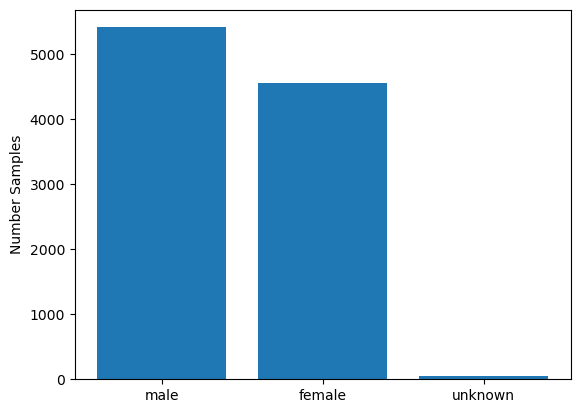

In [35]:
## HISTOGRAM WITH SEX DISTRIBUTION
bar_names = data.sex.unique()
y_pos = np.arange(len(bar_names))
samples_total = [data.loc[data.sex == MALE, SEX].count(), 
                 data.loc[data.sex == FEMALE, SEX].count(),
                 data.loc[data.sex == UNKNOWN, SEX].count()]
plt.bar(y_pos, samples_total, align='center')
plt.xticks(y_pos, bar_names)
plt.ylabel('Number Samples')
plt.show()


In [36]:
## HISTOGRAM WITH LOCALIZATION DISTRIBUTION
local_occurences = data.localization.unique()
local_occurences

array(['scalp', 'ear', 'face', 'back', 'trunk', 'chest',
       'upper extremity', 'abdomen', 'unknown', 'lower extremity',
       'genital', 'neck', 'hand', 'foot', 'acral'], dtype=object)

In [37]:
## DESCRIPTION OF AGE
data[AGE].describe()


count    9958.000000
mean       51.863828
std        16.968614
min         0.000000
25%        40.000000
50%        50.000000
75%        65.000000
max        85.000000
Name: age, dtype: float64

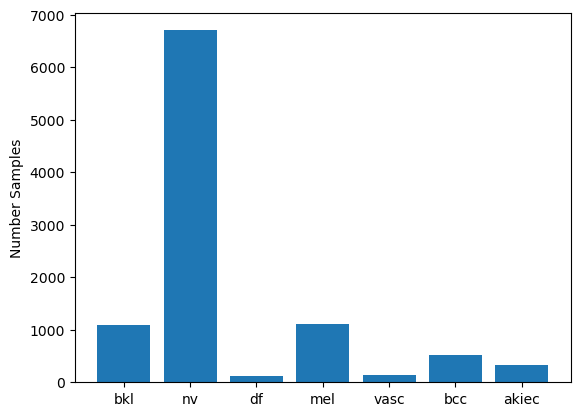

In [38]:
## DISTRIBUTION NUMBER EXAMPLES PER CLASS
y_pos = np.arange(len(classes))
title_classes = ['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec']
samples_total = [data.loc[data.dx == BKL, DX].count(), 
                 data.loc[data.dx == NV, DX].count(),
                 data.loc[data.dx == DF, DX].count(),
                 data.loc[data.dx == MEL, DX].count(),
                 data.loc[data.dx == VASC, DX].count(),
                 data.loc[data.dx == BCC, DX].count(),
                 data.loc[data.dx == AKIEC, DX].count()]
plt.bar(y_pos, samples_total, align='center')
plt.xticks(y_pos, title_classes)
plt.ylabel('Number Samples')
plt.show()


<Axes: xlabel='dx_type'>

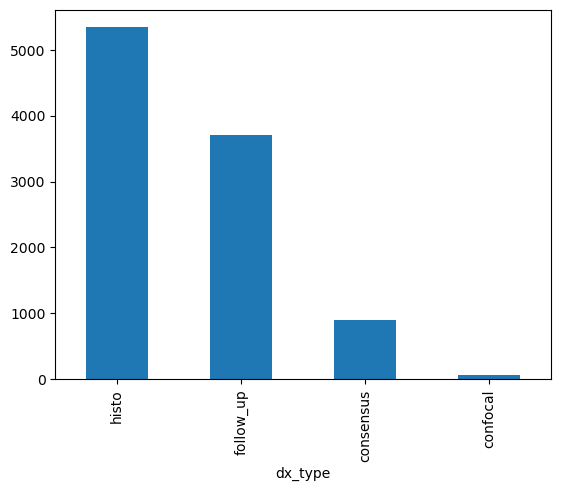

In [39]:
## CHECK TYPE OF DIAGNOSIS MADED
data[DX_TYPE].value_counts().plot(kind='bar')


array([[<Axes: title={'center': 'akiec'}>,
        <Axes: title={'center': 'bcc'}>, <Axes: title={'center': 'bkl'}>],
       [<Axes: title={'center': 'df'}>, <Axes: title={'center': 'mel'}>,
        <Axes: title={'center': 'nv'}>],
       [<Axes: title={'center': 'vasc'}>, <Axes: >, <Axes: >]],
      dtype=object)

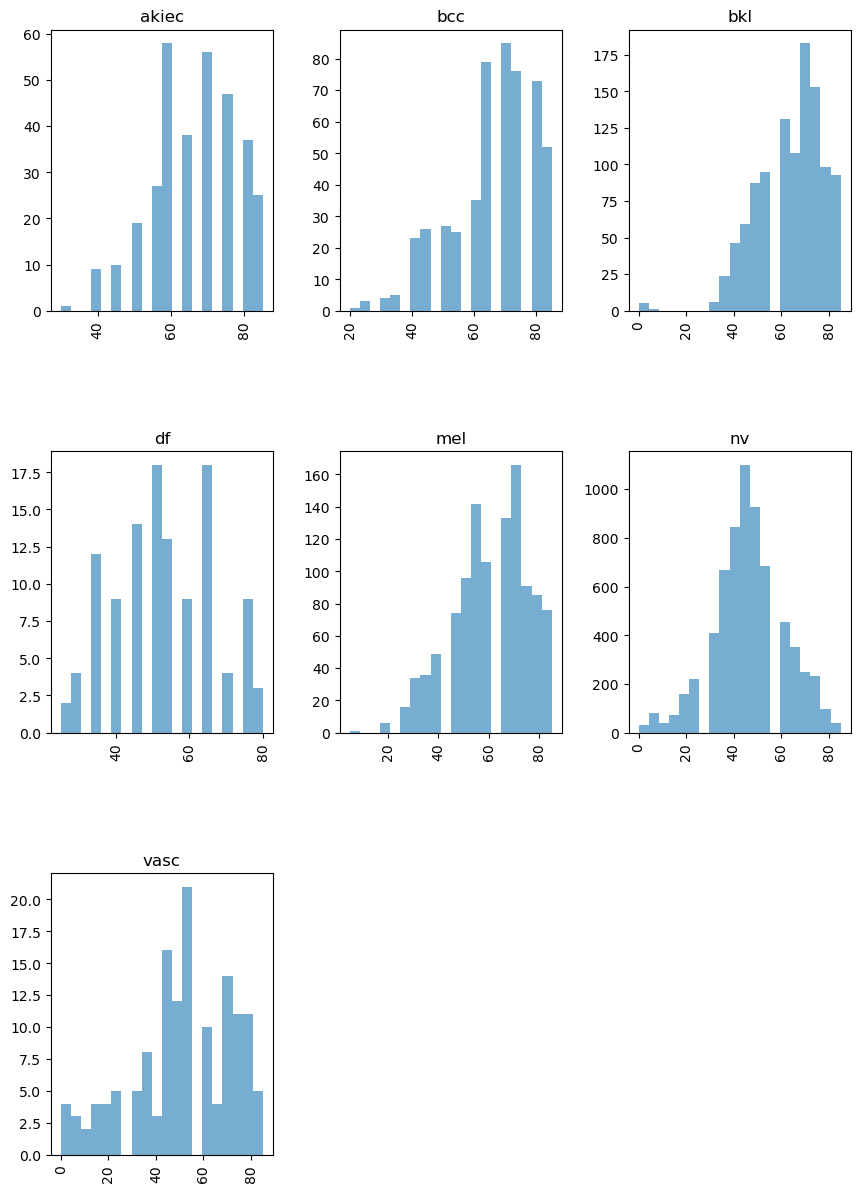

In [40]:
## CHECK DISTRIBUTION OF CLASSES BY AGE
data[AGE].hist(by=data[DX], bins=20, alpha=0.6, figsize=(10, 15))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000219D9B54A20>,
      dtype=object)

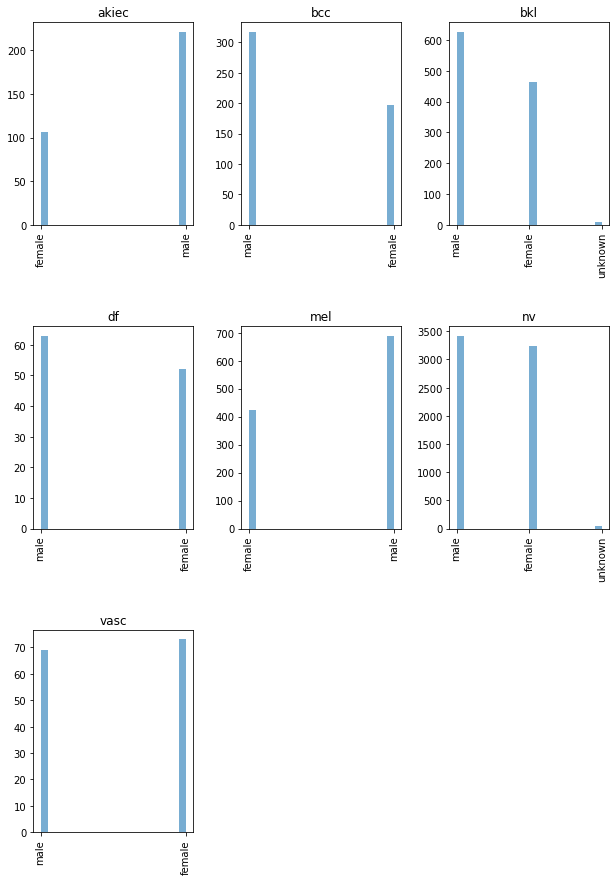

In [21]:
## CHECK DISTRIBUTION OF CLASSES BY SEX
data[SEX].hist(by=data[DX], bins=20, alpha=0.6, figsize=(10, 15))


<Axes: title={'center': 'Samples per localization'}, ylabel='localization'>

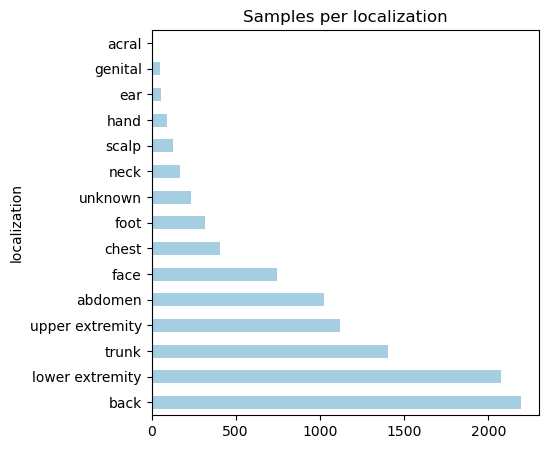

In [41]:
## CHECK WHAT ARE THE MOST BODY AFFECTED AREAS
data[LOCALIZATION].value_counts().plot(kind='barh', figsize=(5, 5), colormap='Paired',
                                        title='Samples per localization')


array([[<Axes: title={'center': 'akiec'}>,
        <Axes: title={'center': 'bcc'}>, <Axes: title={'center': 'bkl'}>],
       [<Axes: title={'center': 'df'}>, <Axes: title={'center': 'mel'}>,
        <Axes: title={'center': 'nv'}>],
       [<Axes: title={'center': 'vasc'}>, <Axes: >, <Axes: >]],
      dtype=object)

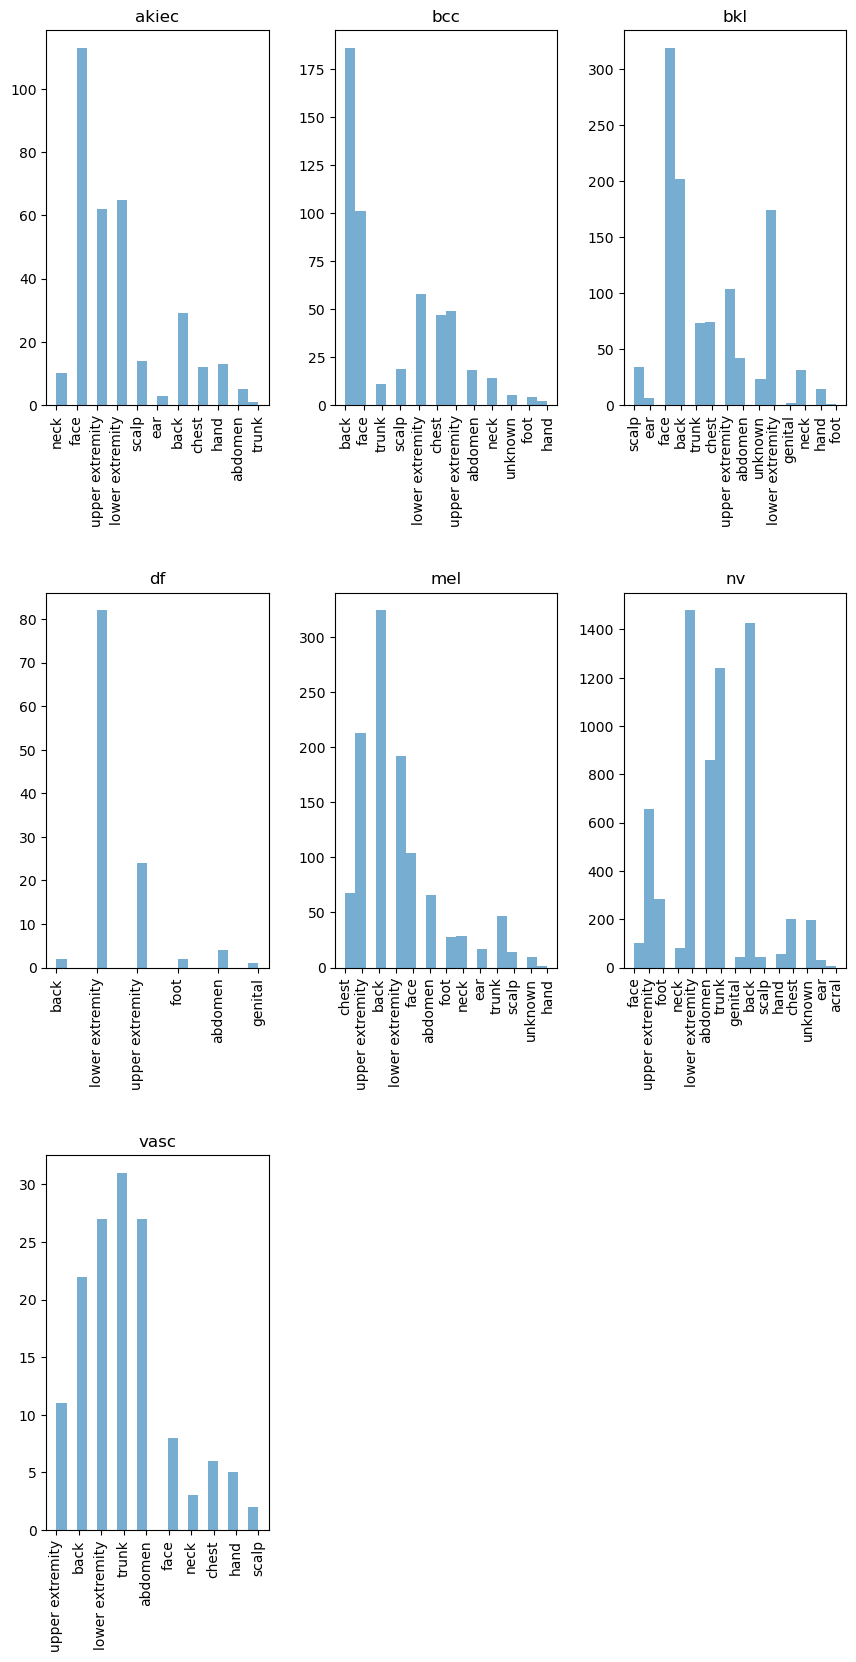

In [42]:
## AFFECTED BODY AREAS BY CLASS
data[LOCALIZATION].hist(by=data[DX], bins=20, alpha=0.6, figsize=(10, 20))


In [44]:
## ACESS IMAGE PIXELS DATAFRAME
PIXELS_PATH = os.path.join(INPUT_DIR, PIXEL_28_RGB_CSV)
pixel_data = pd.read_csv(PIXELS_PATH)


In [45]:
## CHECK SHAPE OF DATAFRAME
pixel_data.shape


(10015, 2353)

In [46]:
pixel_data['label'].value_counts()
# 0 - AKIEC, 1 - BCC, 2 - BKL, 3- DF, 4 - NV, 5 - VASC, 6 - MEL

label
4    6705
6    1113
2    1099
1     514
0     327
5     142
3     115
Name: count, dtype: int64

In [47]:
## FIRST FIVE LINES OF DATAFRAME
pixel_data.head(5)


pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  pixel0006  pixel0007  pixel0008  pixel0009  pixel0010  pixel0011  pixel0012  pixel0013  pixel0014  pixel0015  pixel0016  pixel0017  pixel0018  pixel0019  pixel0020  pixel0021  pixel0022  pixel0023  pixel0024  pixel0025  pixel0026  pixel0027  pixel0028  pixel0029  pixel0030  pixel0031  pixel0032  pixel0033  pixel0034  pixel0035  pixel0036  pixel0037  pixel0038  pixel0039  pixel0040  pixel0041  pixel0042  pixel0043  pixel0044  pixel0045  pixel0046  pixel0047  pixel0048  pixel0049  pixel0050  pixel0051  pixel0052  pixel0053  pixel0054  pixel0055  pixel0056  pixel0057  pixel0058  pixel0059  pixel0060  pixel0061  pixel0062  pixel0063  pixel0064  pixel0065  pixel0066  pixel0067  pixel0068  pixel0069  pixel0070  pixel0071  pixel0072  pixel0073  pixel0074  pixel0075  pixel0076  pixel0077  pixel0078  pixel0079  pixel0080  pixel0081  pixel0082  pixel0083  pixel0084  pixel0085  pixel0086  pixel0087  pixel0088  pixel0089  pixel0090  pixel0091  pixel0092  pixel0093  pixel0094  pixel0095  pixel0096  pixel0097  pixel0098  pixel0099  pixel0100  pixel0101  pixel0102  pixel0103  pixel0104  pixel0105  pixel0106  pixel0107  pixel0108  pixel0109  pixel0110  pixel0111  pixel0112  pixel0113  pixel0114  pixel0115  pixel0116  pixel0117  pixel0118  pixel0119  pixel0120  pixel0121  pixel0122  pixel0123  pixel0124  pixel0125  pixel0126  pixel0127  pixel0128  pixel0129  pixel0130  pixel0131  pixel0132  pixel0133  pixel0134  pixel0135  pixel0136  pixel0137  pixel0138  pixel0139  pixel0140  pixel0141  pixel0142  pixel0143  pixel0144  pixel0145  pixel0146  pixel0147  pixel0148  pixel0149  pixel0150  pixel0151  pixel0152  pixel0153  pixel0154  pixel0155  pixel0156  pixel0157  pixel0158  pixel0159  pixel0160  pixel0161  pixel0162  pixel0163  pixel0164  pixel0165  pixel0166  pixel0167  pixel0168  pixel0169  pixel0170  pixel0171  pixel0172  pixel0173  pixel0174  pixel0175  pixel0176  pixel0177  pixel0178  pixel0179  pixel0180  pixel0181  pixel0182  pixel0183  pixel0184  pixel0185  pixel0186  pixel0187  pixel0188  pixel0189  pixel0190  pixel0191  pixel0192  pixel0193  pixel0194  pixel0195  pixel0196  pixel0197  pixel0198  pixel0199  pixel0200  pixel0201  pixel0202  pixel0203  pixel0204  pixel0205  pixel0206  pixel0207  pixel0208  pixel0209  pixel0210  pixel0211  pixel0212  pixel0213  pixel0214  pixel0215  pixel0216  pixel0217  pixel0218  pixel0219  pixel0220  pixel0221  pixel0222  pixel0223  pixel0224  pixel0225  pixel0226  pixel0227  pixel0228  pixel0229  pixel0230  pixel0231  pixel0232  pixel0233  pixel0234  pixel0235  pixel0236  pixel0237  pixel0238  pixel0239  pixel0240  pixel0241  pixel0242  pixel0243  pixel0244  pixel0245  pixel0246  pixel0247  pixel0248  pixel0249  pixel0250  pixel0251  pixel0252  pixel0253  pixel0254  pixel0255  pixel0256  pixel0257  pixel0258  pixel0259  pixel0260  pixel0261  pixel0262  pixel0263  pixel0264  pixel0265  pixel0266  pixel0267  pixel0268  pixel0269  pixel0270  pixel0271  pixel0272  pixel0273  pixel0274  pixel0275  pixel0276  pixel0277  pixel0278  pixel0279  pixel0280  pixel0281  pixel0282  pixel0283  pixel0284  pixel0285  pixel0286  pixel0287  pixel0288  pixel0289  pixel0290  pixel0291  pixel0292  pixel0293  pixel0294  pixel0295  pixel0296  pixel0297  pixel0298  pixel0299  pixel0300  pixel0301  pixel0302  pixel0303  pixel0304  pixel0305  pixel0306  pixel0307  pixel0308  pixel0309  pixel0310  pixel0311  pixel0312  pixel0313  pixel0314  pixel0315  pixel0316  pixel0317  pixel0318  pixel0319  pixel0320  pixel0321  pixel0322  pixel0323  pixel0324  pixel0325  pixel0326  pixel0327  pixel0328  pixel0329  pixel0330  pixel0331  pixel0332  pixel0333  pixel0334  pixel0335  pixel0336  pixel0337  pixel0338  pixel0339  pixel0340  pixel0341  pixel0342  pixel0343  pixel0344  pixel0345  pixel0346  pixel0347  pixel0348  pixel0349  pixel0350  pixel0351  pixel0352  pixel0353  pixel0354  pixel0355  pixel0356  pixel0357  pixel0358  pixel0359  pixel0360  pixel0361  pixel0362  pixel03

In [48]:
## SHUFFLE ROWS
## NO RESET INDEX, BECAUSE IT'S NOT IMPORTANT IN THIS ANALYSIS
pixel_data = pixel_data.sample(n=len(pixel_data), random_state=42)    
pixel_data.head(5)


pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  pixel0006  pixel0007  pixel0008  pixel0009  pixel0010  pixel0011  pixel0012  pixel0013  pixel0014  pixel0015  pixel0016  pixel0017  pixel0018  pixel0019  pixel0020  pixel0021  pixel0022  pixel0023  pixel0024  pixel0025  pixel0026  pixel0027  pixel0028  pixel0029  pixel0030  pixel0031  pixel0032  pixel0033  pixel0034  pixel0035  pixel0036  pixel0037  pixel0038  pixel0039  pixel0040  pixel0041  pixel0042  pixel0043  pixel0044  pixel0045  pixel0046  pixel0047  pixel0048  pixel0049  pixel0050  pixel0051  pixel0052  pixel0053  pixel0054  pixel0055  pixel0056  pixel0057  pixel0058  pixel0059  pixel0060  pixel0061  pixel0062  pixel0063  pixel0064  pixel0065  pixel0066  pixel0067  pixel0068  pixel0069  pixel0070  pixel0071  pixel0072  pixel0073  pixel0074  pixel0075  pixel0076  pixel0077  pixel0078  pixel0079  pixel0080  pixel0081  pixel0082  pixel0083  pixel0084  pixel0085  pixel0086  pixel0087  pixel0088  pixel0089  pixel0090  pixel0091  pixel0092  pixel0093  pixel0094  pixel0095  pixel0096  pixel0097  pixel0098  pixel0099  pixel0100  pixel0101  pixel0102  pixel0103  pixel0104  pixel0105  pixel0106  pixel0107  pixel0108  pixel0109  pixel0110  pixel0111  pixel0112  pixel0113  pixel0114  pixel0115  pixel0116  pixel0117  pixel0118  pixel0119  pixel0120  pixel0121  pixel0122  pixel0123  pixel0124  pixel0125  pixel0126  pixel0127  pixel0128  pixel0129  pixel0130  pixel0131  pixel0132  pixel0133  pixel0134  pixel0135  pixel0136  pixel0137  pixel0138  pixel0139  pixel0140  pixel0141  pixel0142  pixel0143  pixel0144  pixel0145  pixel0146  pixel0147  pixel0148  pixel0149  pixel0150  pixel0151  pixel0152  pixel0153  pixel0154  pixel0155  pixel0156  pixel0157  pixel0158  pixel0159  pixel0160  pixel0161  pixel0162  pixel0163  pixel0164  pixel0165  pixel0166  pixel0167  pixel0168  pixel0169  pixel0170  pixel0171  pixel0172  pixel0173  pixel0174  pixel0175  pixel0176  pixel0177  pixel0178  pixel0179  pixel0180  pixel0181  pixel0182  pixel0183  pixel0184  pixel0185  pixel0186  pixel0187  pixel0188  pixel0189  pixel0190  pixel0191  pixel0192  pixel0193  pixel0194  pixel0195  pixel0196  pixel0197  pixel0198  pixel0199  pixel0200  pixel0201  pixel0202  pixel0203  pixel0204  pixel0205  pixel0206  pixel0207  pixel0208  pixel0209  pixel0210  pixel0211  pixel0212  pixel0213  pixel0214  pixel0215  pixel0216  pixel0217  pixel0218  pixel0219  pixel0220  pixel0221  pixel0222  pixel0223  pixel0224  pixel0225  pixel0226  pixel0227  pixel0228  pixel0229  pixel0230  pixel0231  pixel0232  pixel0233  pixel0234  pixel0235  pixel0236  pixel0237  pixel0238  pixel0239  pixel0240  pixel0241  pixel0242  pixel0243  pixel0244  pixel0245  pixel0246  pixel0247  pixel0248  pixel0249  pixel0250  pixel0251  pixel0252  pixel0253  pixel0254  pixel0255  pixel0256  pixel0257  pixel0258  pixel0259  pixel0260  pixel0261  pixel0262  pixel0263  pixel0264  pixel0265  pixel0266  pixel0267  pixel0268  pixel0269  pixel0270  pixel0271  pixel0272  pixel0273  pixel0274  pixel0275  pixel0276  pixel0277  pixel0278  pixel0279  pixel0280  pixel0281  pixel0282  pixel0283  pixel0284  pixel0285  pixel0286  pixel0287  pixel0288  pixel0289  pixel0290  pixel0291  pixel0292  pixel0293  pixel0294  pixel0295  pixel0296  pixel0297  pixel0298  pixel0299  pixel0300  pixel0301  pixel0302  pixel0303  pixel0304  pixel0305  pixel0306  pixel0307  pixel0308  pixel0309  pixel0310  pixel0311  pixel0312  pixel0313  pixel0314  pixel0315  pixel0316  pixel0317  pixel0318  pixel0319  pixel0320  pixel0321  pixel0322  pixel0323  pixel0324  pixel0325  pixel0326  pixel0327  pixel0328  pixel0329  pixel0330  pixel0331  pixel0332  pixel0333  pixel0334  pixel0335  pixel0336  pixel0337  pixel0338  pixel0339  pixel0340  pixel0341  pixel0342  pixel0343  pixel0344  pixel0345  pixel0346  pixel0347  pixel0348  pixel0349  pixel0350  pixel0351  pixel0352  pixel0353  pixel0354  pixel0355  pixel0356  pixel0357  pixel0358  pixel0359  pixel0360  pixel0361  pixel0362  pixel03

In [49]:
## EXAMPLE OF THREE IMAGES BY CLASSES --> USING 28*28 PIXEL RGB CSV DILE
def getImagesByClass(target, numberImages):
    images = []
    for i in range(pixel_data.shape[0]):
        if pixel_data.label.iat[i] == target:
            images.append(pixel_data.iloc[i, :-1].values)
        if len(images) == numberImages:
            break
    return images

images_by_classes = []
order = pixel_data.label.unique()
for i in range(len(order)):
    images_by_classes.append(getImagesByClass(i,3))
images_by_classes


[[array([155, 111, 116, ..., 110,  59,  70], dtype=int64),
  array([209, 185, 184, ..., 161, 140, 131], dtype=int64),
  array([202, 135, 160, ..., 192, 146, 157], dtype=int64)],
 [array([180, 148, 152, ..., 191, 157, 155], dtype=int64),
  array([56, 41, 31, ..., 10,  7,  7], dtype=int64),
  array([81, 54, 68, ...,  8,  4, 10], dtype=int64)],
 [array([205, 152, 161, ..., 194, 152, 155], dtype=int64),
  array([186, 144, 152, ..., 185, 149, 153], dtype=int64),
  array([154, 131, 139, ..., 169, 148, 149], dtype=int64)],
 [array([246, 191, 182, ..., 226, 180, 167], dtype=int64),
  array([194, 143, 153, ..., 184, 133, 131], dtype=int64),
  array([176, 145, 138, ..., 150, 111, 107], dtype=int64)],
 [array([214, 167, 173, ..., 214, 147, 140], dtype=int64),
  array([123,  97, 103, ..., 131, 109, 110], dtype=int64),
  array([185, 136, 113, ..., 211, 162, 143], dtype=int64)],
 [array([147, 118, 127, ...,  73,  56,  56], dtype=int64),
  array([187, 126, 119, ..., 193, 152, 169], dtype=int64),
  ar

In [50]:
## RESIZE DATA FROM (DIMENSIONS, ) TO (WIDTH, HEIGHT, CHANNELS)
images_by_classes = np.array(images_by_classes)
images_by_classes = np.reshape(images_by_classes, (images_by_classes.shape[0],
                                                   images_by_classes.shape[1],
                                                   28, 28, 3))

In [51]:
images_by_classes.shape


(7, 3, 28, 28, 3)

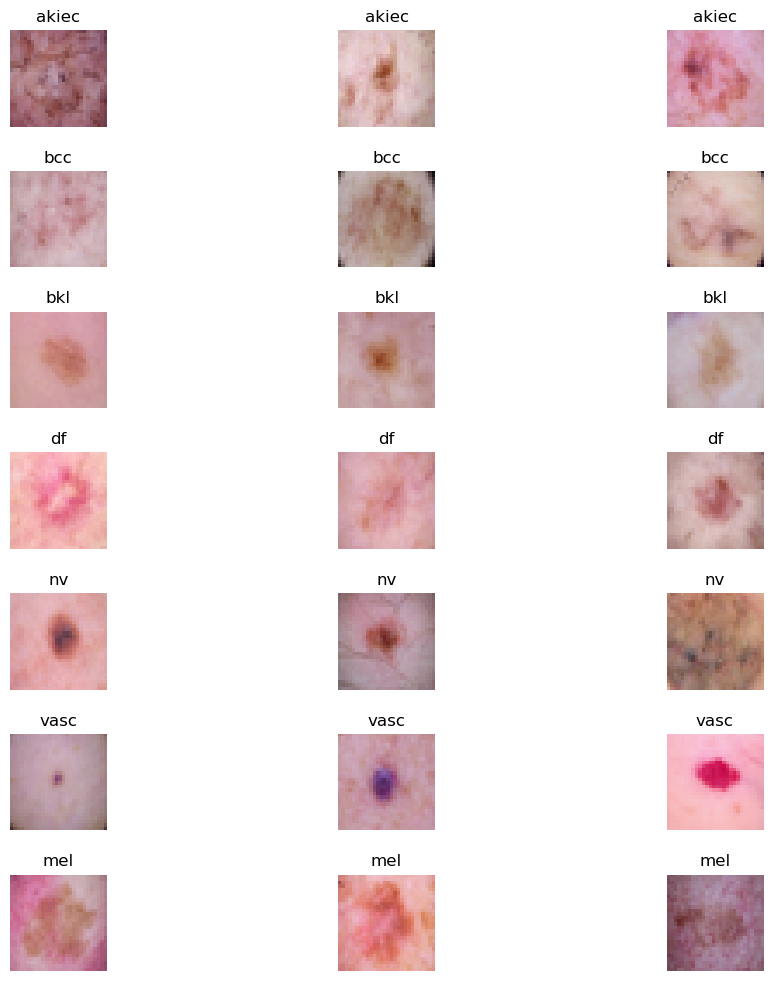

In [52]:
## PLOT 3 IMAGES BY EACH CLASS
f, axr = plt.subplots(7,3, figsize=(10,10))
f.tight_layout()
title = [AKIEC, BCC, BKL, DF, NV, VASC, MEL]
for i in range(7):
    for j in range(3):
        axr[i,j].set_axis_off()
        axr[i,j].imshow(images_by_classes[i][j])
        axr[i,j].set_title(title[i])
#plt.show()